In [26]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd
#
#
cons_info = pd.read_csv("./data/训练组_比特币挖矿_档案明细（20211220）.csv", index_col=0, quotechar='"', encoding="gbk")
#
# 
elec_day = pd.read_csv("./data/训练组_比特币挖矿_日用电明细（20211217）.csv")
#
#
elec_month = pd.read_csv("./data/训练组_比特币挖矿_月用电明细（20211217）.csv")
#
#
target = pd.read_csv("./data/训练组_比特币挖矿_疑似用户明细（20211217）.csv ", index_col="id")

# 数据探索

### 用户档案 cons_info

In [46]:
# 用户档案
cons_info
# 序号	字段英文名	含义说明
# 1	id	用户唯一标识
# 2	elec_type_name	用电类别名称
# 3	volt_name	电压等级名称
# 4	prc_name	电价名称
# 5	contract_cap	合同容量
# 6	run_cap	运行容量
# 7	shift_no	生产班次
# 8	build_date	立户日期
# 9	cancel_date	销户日期
# 10	chk_cycle	检查周期
# 11	last_chk_date	上次检查日期
# 12	tmp_name	临时用电标志
# 13	tmp_date	临时用电到期日期

,ID,ELEC_TYPE_NAME,VOLT_NAME,PRC_NAME,CONTRACT_CAP,RUN_CAP,SHIFT_NO,BUILD_DATE,CANCEL_DATE,CHK_CYCLE,LAST_CHK_DATE,TMP_NAME,TMP_DATE,IS_FLAG
,,,,,,,,,,,,,,
1,329465205,乡村居民生活用电,交流220V,居民合表电价(不满1千伏）,4.0,4.0,1.0,2005/6/18,NaN,240.0,2005/6/18,非临时用电,NaN,0
2,329465245,乡村居民生活用电,交流220V,居民合表电价(不满1千伏）,4.0,4.0,1.0,2005/6/18,NaN,240.0,2005/6/18,非临时用电,NaN,0
3,329465357,乡村居民生活用电,交流220V,居民合表电价(不满1千伏）,8.0,8.0,1.0,2005/6/18,NaN,240.0,2005/6/18,非临时用电,NaN,0
4,329465360,乡村居民生活用电,交流220V,居民合表电价(不满1千伏）,2.0,2.0,1.0,2005/6/18,NaN,240.0,2005/6/18,非临时用电,NaN,0
5,329465439,乡村居民生活用电,交流220V,居民合表电价(不满1千伏）,8.0,8.0,1.0,2005/6/18,NaN,240.0,2005/6/18,非临时用电,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8836,2862711473,乡村居民生活用电,交流380V,居民合表电价(不满1千伏）,39.0,39.0,NaN,2019/12/2 16:12:00,NaN,120.0,2019/12/2 16:12:00,非临时用电,NaN,0
8837,2864274650,乡村居民生活用电,交流220V,居民合表电价(不满1千伏）,13.0,13.0,NaN,2019/12/3 16:33:00,NaN,120.0,2019/12/3 16:33:00,非临时用电,NaN,0
8838,2872313739,乡村居民生活用电,交流380V,居民合表电价(不满1千伏）,39.0,39.0,NaN,2019/12/18 14:42:00,NaN,120.0,2019/12/18 14:42:00,非临时用电,NaN,0


In [48]:
# 探索性工作

# 有多少独立用户？
len(cons_info['ID'].unique())

8840

In [49]:
cons_info.PRC_NAME.unique()

array(['居民合表电价(不满1千伏）', '居民合表电价(1-10千伏）'], dtype=object)

In [ ]:
# 目前看来，用户基础数据里面的数值对检查没有什么直接价值
# 所以，直接看用电量即可

elec_day elec_month

In [6]:
#日用电量
elec_day
# 1	id	用户唯一标识
# 2	rq	日期
# 3	kwh	当日抄见电量
# 4	kwh_rap	昨日反向电量
# 5	kwh_pap_r1	昨日正向费率1电量
# 6	kwh_pap_r2	昨日正向费率2电量
# 7	kwh_pap_r3	昨日正向费率3电量
# 8	kwh_pap_r4	昨日正向费率4电量

,id,rq,kwh,kwh_rap,kwh_pap_r1,kwh_pap_r2,kwh_pap_r3,kwh_pap_r4
0,329449398,2020-01-22 00:00:00,11.77,0.0,0.0,7.40,0.0,4.36
1,329449398,2020-01-23 00:00:00,16.54,0.0,0.0,8.68,0.0,7.86
2,329449398,2020-01-24 00:00:00,10.86,0.0,0.0,5.51,0.0,5.36
3,329449398,2020-01-25 00:00:00,10.91,0.0,0.0,6.48,0.0,4.43
4,329449398,2020-01-26 00:00:00,10.85,0.0,0.0,6.32,0.0,4.52
...,...,...,...,...,...,...,...,...
954564,2878334859,2021-10-05 00:00:00,7.22,NaN,0.0,4.49,0.0,2.73
954565,2878334859,2021-10-06 00:00:00,7.23,NaN,0.0,4.48,0.0,2.74
954566,2878334859,2021-10-07 00:00:00,7.20,NaN,0.0,4.48,0.0,2.73
954567,2878334859,2021-10-08 00:00:00,7.23,NaN,0.0,4.50,0.0,2.73


##### 正向费率有什么用？

In [99]:
elec_day[['kwh','kwh_rap','kwh_pap_r1',	'kwh_pap_r2',	'kwh_pap_r3',	'kwh_pap_r4']].agg(sum)

kwh           20364014.98
kwh_rap          39934.21
kwh_pap_r1         947.23
kwh_pap_r2    10271633.73
kwh_pap_r3     4144623.03
kwh_pap_r4     5793514.80
dtype: float64

In [8]:
elec_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954569 entries, 0 to 954568
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          954569 non-null  int64  
 1   rq          954569 non-null  object 
 2   kwh         941020 non-null  float64
 3   kwh_rap     304903 non-null  float64
 4   kwh_pap_r1  934608 non-null  float64
 5   kwh_pap_r2  934601 non-null  float64
 6   kwh_pap_r3  934607 non-null  float64
 7   kwh_pap_r4  934597 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 58.3+ MB


In [4]:
# 月用电量
elec_month
# 序号	字段英文名	含义说明
# 1	id	用户唯一标识
# 2	ym	电费年月
# 3	pq_f	峰电量
# 4	pq_g	谷电量
# 5	pq_p	平电量
# 6	pq_z	总电量

,id,ym,pq_f,pq_g,pq_p,pq_z
0,329769614,202001,615,161,0,776
1,329769614,202002,492,154,-1,645
2,329769614,202003,457,114,1,572
3,329769614,202004,522,171,0,693
4,329769614,202005,519,181,0,700
...,...,...,...,...,...,...
194475,2878334859,202106,107,67,-1,173
194476,2878334859,202107,170,112,1,283
194477,2878334859,202108,102,67,0,169
194478,2878334859,202109,112,65,-1,176


In [28]:
# elec_month[elec_month['id']==2695447713]
elec_month.query("id==2695447713")

,id,ym,pq_f,pq_g,pq_p,pq_z
178178,2695447713,202001,1898,1814,1928,5640
178179,2695447713,202002,1886,1721,1884,5491
178180,2695447713,202003,1802,1646,1794,5242
178181,2695447713,202004,2122,1942,2133,6197
178182,2695447713,202005,2078,1891,2093,6062
178183,2695447713,202006,2203,1987,2201,6391
178184,2695447713,202007,2150,2011,2197,6358
178185,2695447713,202008,2376,2198,2432,7006
178186,2695447713,202009,2551,2316,2580,7447
178187,2695447713,202010,4368,4164,4546,13078


In [280]:
# 有的用户一直都没有p时段
elec_month.query("id==329449398")

,id,ym,pq_f,pq_g,pq_p,pq_z
51634,329449398,202001,234,129,-1,362
51635,329449398,202002,257,145,0,402
51636,329449398,202003,167,116,1,284
51637,329449398,202004,170,112,-1,281
51638,329449398,202005,239,162,0,401
51639,329449398,202006,236,152,0,388
51640,329449398,202007,337,182,0,519
51641,329449398,202008,355,159,0,514
51642,329449398,202009,378,188,1,567
51643,329449398,202010,447,248,-1,694


### 独立月份

In [20]:
elec_month['ym'].unique()

array([202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008,
       202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104,
       202105, 202106, 202107, 202108, 202109, 202110, 202111],
      dtype=int64)

(array([1.07684e+05, 2.76860e+04, 2.17370e+04, 1.34300e+04, 8.12100e+03,
        4.96100e+03, 2.91800e+03, 1.99100e+03, 1.24600e+03, 9.13000e+02,
        6.29000e+02, 4.58000e+02, 3.70000e+02, 3.57000e+02, 2.56000e+02,
        2.28000e+02, 1.79000e+02, 1.53000e+02, 1.34000e+02, 1.09000e+02,
        1.03000e+02, 8.40000e+01, 7.80000e+01, 6.20000e+01, 5.40000e+01,
        4.20000e+01, 2.80000e+01, 4.50000e+01, 3.00000e+01, 2.40000e+01,
        1.70000e+01, 3.50000e+01, 1.70000e+01, 1.80000e+01, 1.90000e+01,
        1.50000e+01, 1.30000e+01, 8.00000e+00, 6.00000e+00, 8.00000e+00,
        9.00000e+00, 1.60000e+01, 1.30000e+01, 1.00000e+01, 1.30000e+01,
        1.00000e+01, 6.00000e+00, 7.00000e+00, 8.00000e+00, 9.00000e+00,
        6.00000e+00, 4.00000e+00, 5.00000e+00, 3.00000e+00, 3.00000e+00,
        2.00000e+00, 4.00000e+00, 3.00000e+00, 2.00000e+00, 1.00000e+00,
        2.00000e+00, 2.00000e+00, 5.00000e+00, 3.00000e+00, 4.00000e+00,
        1.00000e+00, 1.00000e+00, 8.00000e+00, 1.00

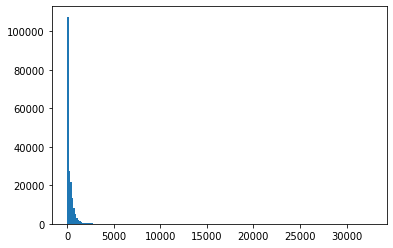

In [12]:
# 看一下每个维度的数据分布情况
plt.hist(elec_month['pq_f'],bins=200)

疑似用户 target

In [3]:
# 疑似用户明细
target

,elec_type_name,volt_name,prc_name,contract_cap,run_cap,shift_no,build_date,cancel_date,chk_cycle,last_chk_date,tmp_name,tmp_date
id,,,,,,,,,,,,
329833811,城镇居民生活用电,交流380V,居民合表电价(不满1千伏）,50,50,NaN,2008-10-31 08:21:23,NaN,240,2008-10-31 00:00:00,非临时用电,NaN
2294741747,城镇居民生活用电,交流380V,居民合表电价(不满1千伏）,400,400,1.0,2016-07-13 17:37:32,NaN,12,2021-01-26 00:00:00,非临时用电,NaN
2654985038,城镇居民生活用电,交流380V,居民合表电价(不满1千伏）,300,300,NaN,2018-10-17 08:28:47,NaN,120,2018-10-17 08:28:47,非临时用电,NaN
2674563661,城镇居民生活用电,交流380V,居民合表电价(不满1千伏）,99,99,NaN,2018-11-22 16:45:09,NaN,120,2018-11-22 16:45:09,非临时用电,NaN
2695447713,城镇居民生活用电,交流380V,居民合表电价(不满1千伏）,90,90,NaN,2019-01-10 15:36:24,NaN,120,2019-01-10 15:36:24,非临时用电,NaN
1998335717,城镇居民生活用电,交流380V,居民合表电价(不满1千伏）,30,30,NaN,2014-06-20 09:05:26,NaN,120,2014-06-20 09:05:26,非临时用电,NaN
2482675592,城镇居民生活用电,交流380V,居民合表电价(不满1千伏）,95,95,NaN,2017-10-13 10:49:32,NaN,120,2017-10-13 10:49:32,非临时用电,NaN
2614556942,城镇居民生活用电,交流380V,居民合表电价(不满1千伏）,30,30,NaN,2018-08-16 09:34:42,NaN,120,2018-08-16 09:34:42,非临时用电,NaN
2816697143,城镇居民生活用电,交流380V,居民合表电价(不满1千伏）,400,400,NaN,2019-09-06 18:03:32,NaN,120,2019-09-06 18:03:32,非临时用电,NaN


In [4]:
target_id = list(target.index)
target_id

[329833811,
 2294741747,
 2654985038,
 2674563661,
 2695447713,
 1998335717,
 2482675592,
 2614556942,
 2816697143,
 2825771263]

In [ ]:
# 注意，其中的信息包括：
# 用户档案 cons_info
# 序号	字段英文名	含义说明
# 1	id	用户唯一标识
# 2	elec_type_name	用电类别名称
# 3	volt_name	电压等级名称
# 4	prc_name	电价名称
# 5	contract_cap	合同容量
# 6	run_cap	运行容量
# 7	shift_no	生产班次
# 8	build_date	立户日期
# 9	cancel_date	销户日期
# 10	chk_cycle	检查周期
# 11	last_chk_date	上次检查日期
# 12	tmp_name	临时用电标志
# 13	tmp_date	临时用电到期日期
# 与这里是完全一致的，就是单纯的用户信息整行。

In [22]:
# 疑似用户的月用电量
for i in target.index:
    print(i)
    print(elec_month[elec_month['id']==i])
    

329833811
              id      ym  pq_f  pq_g  pq_p   pq_z
26070  329833811  202001  4687  4685  4683  14055
26071  329833811  202002  3033  3064  3044   9141
26072  329833811  202003  4025  3922  4028  11975
26073  329833811  202004  1784  1767  1783   5334
26074  329833811  202005   117   110   132    359
26075  329833811  202006   263   232   271    766
26076  329833811  202007   372   345   365   1082
26077  329833811  202008   444   403   463   1310
26078  329833811  202009   390   331   386   1107
26079  329833811  202010   442   464   440   1346
26080  329833811  202011   139   146   140    425
26081  329833811  202012   158   154   154    466
26082  329833811  202101    92    80    98    270
26083  329833811  202102   154   109   159    422
26084  329833811  202103   144   128   144    416
26085  329833811  202104   117   123   114    354
26086  329833811  202105    88    87    87    262
26087  329833811  202106  1058  1060  1071   3189
26088  329833811  202107  6148  6299  61

In [24]:
# 随机抽取一位正常用户，看到的月用电量
print(elec_month[elec_month['id']==329465245])


              id      ym  pq_f  pq_g  pq_p  pq_z
38764  329465245  202001   590   234     0   824
38765  329465245  202002   629   241     0   870
38766  329465245  202003   497   168     0   665
38767  329465245  202004   430   184    -1   613
38768  329465245  202005   471   205     1   677
38769  329465245  202006   753   292     0  1045
38770  329465245  202007   804   384     0  1188
38771  329465245  202008   926   465     0  1391
38772  329465245  202009   903   397    -1  1299
38773  329465245  202010  1556   707     0  2263
38774  329465245  202011   659   294     0   953
38775  329465245  202012   601   246     1   848
38776  329465245  202101   607   197     0   804
38777  329465245  202102   521   230     0   751
38778  329465245  202103   632   313     0   945
38779  329465245  202104   688   321     0  1009
38780  329465245  202105   833   370     0  1203
38781  329465245  202106   789   396    -1  1184
38782  329465245  202107   703   360     0  1063
38783  329465245  20

In [27]:
# 疑似用户的日用电量

for i in target.index:
    print(elec_day[elec_day['id']==i])

               id                   rq     kwh  kwh_rap  kwh_pap_r1  \
289497  329833811  2020-01-22 00:00:00  105.75      NaN         0.0   
289498  329833811  2020-01-23 00:00:00  108.30      NaN         0.0   
289499  329833811  2020-01-24 00:00:00  106.50      NaN         0.0   
289500  329833811  2020-01-25 00:00:00  103.20      NaN         0.0   
289501  329833811  2020-01-26 00:00:00  119.25      NaN         0.0   
...           ...                  ...     ...      ...         ...   
289600  329833811  2021-10-05 00:00:00  418.35      NaN         0.0   
289601  329833811  2021-10-06 00:00:00  403.80      NaN         0.0   
289602  329833811  2021-10-07 00:00:00  421.65      NaN         0.0   
289603  329833811  2021-10-08 00:00:00  415.50      NaN         0.0   
289604  329833811  2021-10-09 00:00:00  421.95      NaN         0.0   

        kwh_pap_r2  kwh_pap_r3  kwh_pap_r4  
289497       35.40       37.20       33.00  
289498       35.70       37.95       34.65  
289499      

# 思路

In [ ]:
# 思路：
# 绝对值（日用电量或者月用电量）；
# 相对值（相对于平均值的变动情况）；
# 波动情况或者百分比；
# 分位数；
# 峰谷比



# 数据准备

### 数据和标签融合

按照id匹配，将标签补充在数据后面

### 生成y序列

In [87]:
cons_info[['ID','RUN_CAP']].set_index("ID")

,RUN_CAP
ID,
329465205,4.0
329465245,4.0
329465357,8.0
329465360,2.0
329465439,8.0
...,...
2862711473,39.0
2864274650,13.0
2872313739,39.0


In [8]:
user_all = cons_info['ID']
user_all = pd.DataFrame([user_all]).T

user_all['label']=user_all['ID'].agg(lambda x: 1 if x in target.index else 0)
user_all = user_all.set_index('ID').join(cons_info[['ID','RUN_CAP']].set_index("ID"))
user_all

,label,RUN_CAP
ID,,
329465205,0,4.0
329465245,0,4.0
329465357,0,8.0
329465360,0,2.0
329465439,0,8.0
...,...,...
2862711473,0,39.0
2864274650,0,13.0
2872313739,0,39.0


In [89]:
# 检查一下是否正确匹配，10个就是正确
user_all.query("label==1")

,label,RUN_CAP
ID,,
329833811,1,50.0
2294741747,1,400.0
2654985038,1,300.0
2674563661,1,99.0
2695447713,1,90.0
1998335717,1,30.0
2482675592,1,95.0
2614556942,1,30.0
2816697143,1,400.0


# （0）参考方法

# 分析【月用电量】

In [9]:
# 根据月用电量画图 
elec_month_all = pd.merge(elec_month,user_all,how='left',left_on='id',right_index=True)
elec_month_all


,id,ym,pq_f,pq_g,pq_p,pq_z,label,RUN_CAP
0,329769614,202001,615,161,0,776,0,10.0
1,329769614,202002,492,154,-1,645,0,10.0
2,329769614,202003,457,114,1,572,0,10.0
3,329769614,202004,522,171,0,693,0,10.0
4,329769614,202005,519,181,0,700,0,10.0
...,...,...,...,...,...,...,...,...
194475,2878334859,202106,107,67,-1,173,0,13.0
194476,2878334859,202107,170,112,1,283,0,13.0
194477,2878334859,202108,102,67,0,169,0,13.0
194478,2878334859,202109,112,65,-1,176,0,13.0


In [92]:
elec_month_all.query("label==0").pq_z / elec_month_all.query("label==0").RUN_CAP

0         77.600000
1         64.500000
2         57.200000
3         69.300000
4         70.000000
            ...    
194475    13.307692
194476    21.769231
194477    13.000000
194478    13.538462
194479    17.615385
Length: 194260, dtype: float64

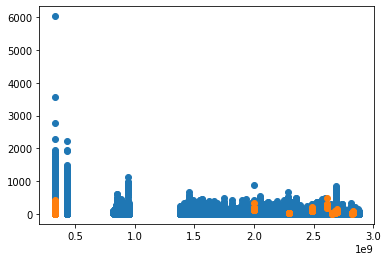

In [93]:
plt.scatter(elec_month_all.query("label==0").id,elec_month_all.query("label==0").pq_z / elec_month_all.query("label==0").RUN_CAP)
plt.scatter(elec_month_all.query("label==1").id,elec_month_all.query("label==1").pq_z / elec_month_all.query("label==1").RUN_CAP)

### 如果直接看绝对值？

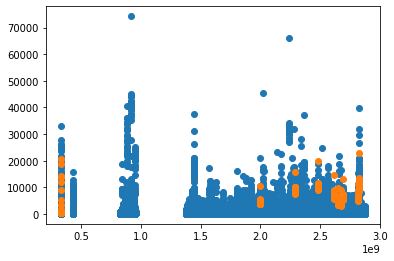

In [94]:
plt.scatter(elec_month_all.query("label==0").id,elec_month_all.query("label==0").pq_z)
plt.scatter(elec_month_all.query("label==1").id,elec_month_all.query("label==1").pq_z)

结论：每月用电量绝对值不能直接区分

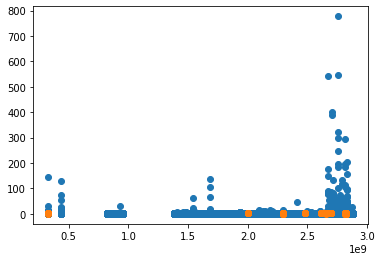

In [102]:
# 如果是峰谷平划分呢？
plt.scatter(elec_month_all.query("label==0").id,elec_month_all.query("label==0").pq_g / elec_month_all.query("label==0").pq_f)
plt.scatter(elec_month_all.query("label==1").id,elec_month_all.query("label==1").pq_g / elec_month_all.query("label==1").pq_f)

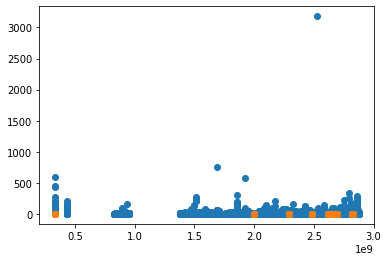

In [103]:
plt.scatter(elec_month_all.query("label==0").id,elec_month_all.query("label==0").pq_f / elec_month_all.query("label==0").pq_g)
plt.scatter(elec_month_all.query("label==1").id,elec_month_all.query("label==1").pq_f / elec_month_all.query("label==1").pq_g)

### 猜测：挖矿用户的月用电量峰谷差较小

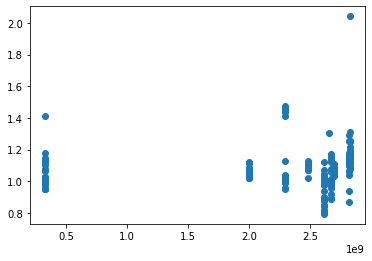

In [104]:
plt.scatter(elec_month_all.query("label==1").id,elec_month_all.query("label==1").pq_f / elec_month_all.query("label==1").pq_g)

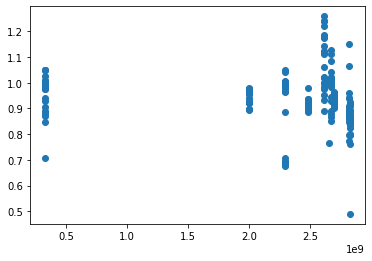

In [105]:
plt.scatter(elec_month_all.query("label==1").id,elec_month_all.query("label==1").pq_g / elec_month_all.query("label==1").pq_f)

(array([ 4.,  3.,  3.,  5.,  3.,  9., 47., 28., 24., 33., 25., 13.,  8.,
         1.,  4.,  1.,  2.,  0.,  0.,  2.,  2.,  2.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.]),
 array([0.79435128, 0.82554607, 0.85674086, 0.88793565, 0.91913044,
        0.95032523, 0.98152002, 1.01271481, 1.0439096 , 1.07510438,
        1.10629917, 1.13749396, 1.16868875, 1.19988354, 1.23107833,
        1.26227312, 1.29346791, 1.3246627 , 1.35585749, 1.38705228,
        1.41824707, 1.44944186, 1.48063665, 1.51183144, 1.54302623,
        1.57422102, 1.60541581, 1.63661059, 1.66780538, 1.69900017,
        1.73019496, 1.76138975, 1.79258454, 1.82377933, 1.85497412,
        1.88616891, 1.9173637 , 1.94855849, 1.97975328, 2.01094807,
        2.04214286]),
 <BarContainer object of 40 artists>)

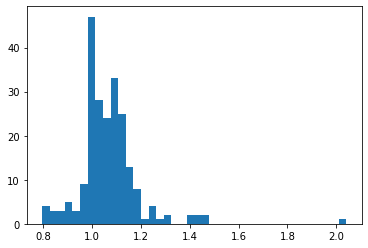

In [107]:
# 峰谷比范围：
plt.hist(elec_month_all.query("label==1").pq_f / elec_month_all.query("label==1").pq_g,40)

In [109]:
import numpy as np

print('std=',np.std(elec_month_all.query("label==1").pq_f / elec_month_all.query("label==1").pq_g))
print('mean=',np.mean(elec_month_all.query("label==1").pq_f / elec_month_all.query("label==1").pq_g))

std= 0.12645630593863316
mean= 1.06690573664936


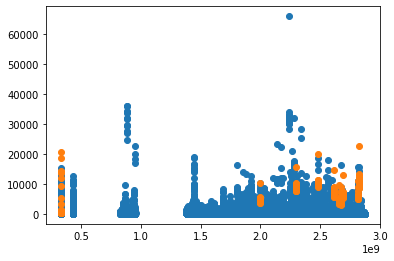

In [10]:
tmp0 = elec_month_all.query("label==0 and pq_f/pq_g>0.8 and pq_f/pq_g<1.5")
tmp1 = elec_month_all.query("label==1")
plt.scatter(tmp0.id,tmp0.pq_z)
plt.scatter(tmp1.id,tmp1.pq_z)

In [ ]:
# 从用电总量上似乎不能进一步划分

### 看最大用电量的1个月
也就是说不看全年了

In [11]:
# 
# 如果找最大谷时段的
tmp0_top1 = tmp0.groupby('id').apply(lambda x:x.sort_values('pq_g',ascending=False).head(1))

tmp1_top1 = tmp1.groupby('id').apply(lambda x:x.sort_values('pq_g',ascending=False).head(1))

In [268]:
# tmp1.groupby('id').apply(lambda x:x.sort_values('pq_g',ascending=False).head(3).tail(1))

In [12]:
tmp0_top1

,,id,ym,pq_f,pq_g,pq_p,pq_z,label,RUN_CAP
id,,,,,,,,,
329449398,51638,329449398,202005,239,162,0,401,0,8.0
329450568,51680,329450568,202003,19,16,-1,34,0,2.0
329450586,51705,329450586,202006,96,65,1,162,0,4.0
329450735,52796,329450735,202107,13,9,0,22,0,2.0
329450779,51669,329450779,202102,66,50,1,117,0,2.0
...,...,...,...,...,...,...,...,...,...
2876802382,194255,2876802382,202106,1,1,0,2,0,13.0
2876866879,194335,2876866879,202010,60,62,0,122,0,13.0
2876937035,194365,2876937035,202106,6,5,0,11,0,13.0


In [13]:
tmp1_top1

,,id,ym,pq_f,pq_g,pq_p,pq_z,label,RUN_CAP
id,,,,,,,,,
329833811,26089,329833811,202108,6887,6858,6913,20658,1,50.0
1998335717,126641,1998335717,202010,3476,3394,3508,10378,1,30.0
2294741747,149191,2294741747,202010,5208,5160,5417,15785,1,400.0
2482675592,162545,2482675592,202010,6785,6250,7009,20044,1,95.0
2614556942,171873,2614556942,202010,4740,5031,4909,14680,1,30.0
2654985038,174579,2654985038,202010,3270,3264,3264,9798,1,300.0
2674563661,175877,2674563661,202010,3037,2986,3095,9118,1,99.0
2695447713,178187,2695447713,202010,4368,4164,4546,13078,1,90.0
2816697143,186811,2816697143,202010,3919,3419,3801,11139,1,400.0


Text(0, 0.5, 'pq_g')

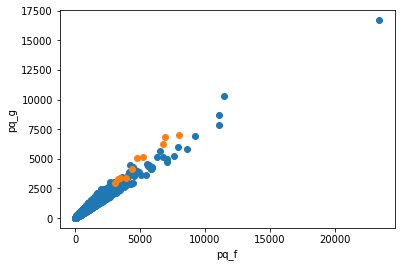

In [15]:
# 看最大月份的峰谷平
plt.scatter(tmp0_top1.pq_f,tmp0_top1.pq_g)
plt.scatter(tmp1_top1.pq_f,tmp1_top1.pq_g)
plt.xlabel('pq_f')
plt.ylabel('pq_g')


Text(0, 0.5, 'pq_z')

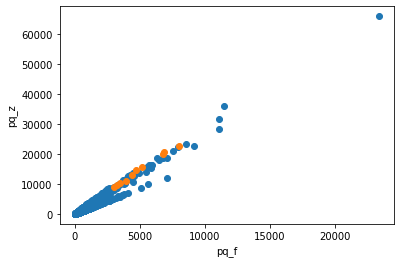

In [16]:
plt.scatter(tmp0_top1.pq_f,tmp0_top1.pq_z)
plt.scatter(tmp1_top1.pq_f,tmp1_top1.pq_z)
plt.xlabel('pq_f')
plt.ylabel('pq_z')

In [122]:
# 这样可以进一步看出，挖矿用户的最大月用电量不会很小

### 如果用第k个月

In [21]:
k=22 - int(22*0.8)

tmp0k = tmp0.groupby('id').apply(lambda x:x.sort_values('pq_g',ascending=False).head(k).tail(1))

tmp1k = tmp1.groupby('id').apply(lambda x:x.sort_values('pq_g',ascending=False).head(k).tail(1))

Text(0, 0.5, 'pq_g')

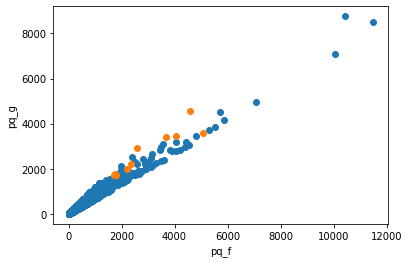

In [23]:
# 看最大月份的峰谷
plt.scatter(tmp0k.pq_f,tmp0k.pq_g)
plt.scatter(tmp1k.pq_f,tmp1k.pq_g)
plt.xlabel('pq_f')
plt.ylabel('pq_g')

### 思路：比较全年每个月之间的关系？

In [266]:
# 还有个思路，每一户自己的月用电量不应该差距很大（因为生产或生活方式相对固定）
# 从原理上就不现实；

In [319]:
# 先探索一下

In [24]:
tmp0.groupby('id')['pq_z'].agg(['max','min','median'])


,max,min,median
id,,,
329449398,401,284,342.5
329450568,34,18,25.0
329450586,162,162,162.0
329450735,22,7,14.0
329450779,117,2,67.0
...,...,...,...
2876802382,2,2,2.0
2876866879,122,24,49.0
2876937035,11,2,3.0


In [27]:
tmp1.groupby('id')['pq_z'].agg(['max','min','median',lambda x:np.percentile(x,80)])


,max,min,median,<lambda_0>
id,,,,
329833811,20658,262,1208.5,13380.6
1998335717,10378,3610,4990.0,5371.4
2294741747,15785,7635,8633.5,9853.2
2482675592,20044,9130,10026.0,10823.4
2614556942,14680,5567,7574.5,7929.2
2654985038,9798,3166,4875.0,5197.2
2674563661,9118,3072,4117.5,5388.6
2695447713,13078,5242,6667.0,6978.6
2816697143,11139,4918,5683.0,6367.2


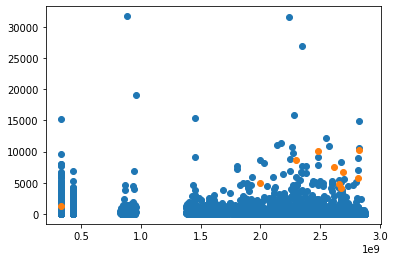

In [33]:
# 分位数识别
tmp01=tmp0.groupby('id')['pq_z'].agg(['max','min','median',lambda x:np.percentile(x,80)])
tmp11=tmp1.groupby('id')['pq_z'].agg(['max','min','median',lambda x:np.percentile(x,80)])
tmp11.columns = (['max','min','median','p80'])

plt.scatter(tmp01.index,tmp01.iloc[:,2])
plt.scatter(tmp11.index,tmp11.iloc[:,2])
# plt.ylim((1,20))

In [47]:
cons_info[['RUN_CAP']]

,RUN_CAP
,
1,4.0
2,4.0
3,8.0
4,2.0
5,8.0
...,...
8836,39.0
8837,13.0
8838,39.0


In [48]:
pd.merge(cons_info[['ID','RUN_CAP']],tmp11,how='right',left_on='ID',right_on='id')

,ID,RUN_CAP,max,min,median,p80
0,329833811,50.0,20658,262,1208.5,13380.6
1,1998335717,30.0,10378,3610,4990.0,5371.4
2,2294741747,400.0,15785,7635,8633.5,9853.2
3,2482675592,95.0,20044,9130,10026.0,10823.4
4,2614556942,30.0,14680,5567,7574.5,7929.2
5,2654985038,300.0,9798,3166,4875.0,5197.2
6,2674563661,99.0,9118,3072,4117.5,5388.6
7,2695447713,90.0,13078,5242,6667.0,6978.6
8,2816697143,400.0,11139,4918,5683.0,6367.2
9,2825771263,260.0,22736,8490,10236.0,11944.2


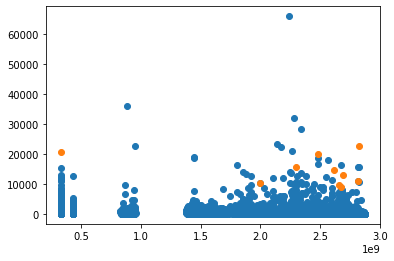

In [29]:
# 每一户的最大值

plt.scatter(tmp01.index,tmp01.iloc[:,0])
plt.scatter(tmp11.index,tmp11.iloc[:,0])

(1.0, 3.0)

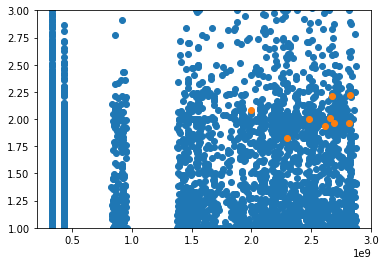

In [159]:
# 比值：
plt.scatter(tmp01.index,tmp01['max']/tmp01['median'])
plt.scatter(tmp11.index,tmp11['max']/tmp11['median'])
plt.ylim((1,3))

(5000.0, 30000.0)

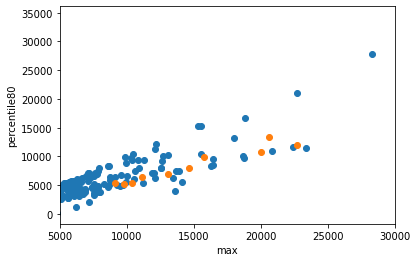

In [31]:
plt.scatter(tmp01['max'],tmp01.iloc[:,3])
plt.scatter(tmp11['max'],tmp11.iloc[:,3])
plt.xlabel('max')
plt.ylabel('percentile80')
plt.xlim(5000,30000)

(8000.0, 30000.0)

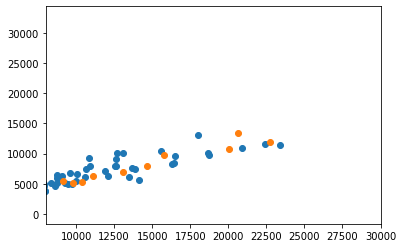

In [195]:
tmp01f = tmp01[(tmp01['max']/tmp01['median']<3) & (tmp01['max']/tmp01['median']>1.5)]
plt.scatter(tmp01f['max'],tmp01f.iloc[:,3])
plt.scatter(tmp11['max'],tmp11.iloc[:,3])

plt.xlim(8000,30000)

### 还有个可能性是看连续性。
因为挖矿买来之后就要持续运行，所以运行起来之后就一直在高位，但是普通用户是有高低之分的

In [263]:
tmp1.query("id==329833811")

,id,ym,pq_f,pq_g,pq_p,pq_z,label,RUN_CAP
26070,329833811,202001,4687,4685,4683,14055,1,50.0
26071,329833811,202002,3033,3064,3044,9141,1,50.0
26072,329833811,202003,4025,3922,4028,11975,1,50.0
26073,329833811,202004,1784,1767,1783,5334,1,50.0
26074,329833811,202005,117,110,132,359,1,50.0
26075,329833811,202006,263,232,271,766,1,50.0
26076,329833811,202007,372,345,365,1082,1,50.0
26077,329833811,202008,444,403,463,1310,1,50.0
26078,329833811,202009,390,331,386,1107,1,50.0
26079,329833811,202010,442,464,440,1346,1,50.0


结论是，连续性并不能保证

从下面的分析，反而是可能挖矿的月度规律性很差？？

# 数据和标签融合

按照id匹配，将标签补充在数据后面

In [320]:
# 怎样衡量规律性？

In [322]:
# 测试：第二年减去第一年，对应月份差额之和除以两年总用电量

In [379]:
def glx(lst):
    if len(lst)!=22:
        return 'not 22'
    y1=lst[0:10]
    y2=lst[12:]
    tot = sum(lst) - min(lst)*10
    res = sum(np.abs(np.array(y2)-np.array(y1)))/tot
    return res

def find10(lst):
    lst=list(lst)
    tot = sum(lst)
    v10 = lst[9]
    return v10/tot

0.08550246133108103


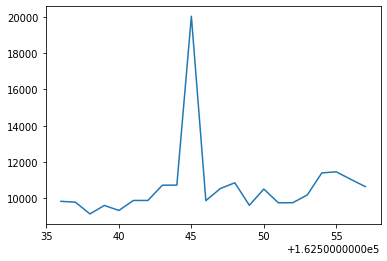

In [382]:
tmp_consno = target.index[6] # 挖矿户
v1 = find10(list(elec_month.query("id==@tmp_consno").sort_values('ym')['pq_z']))
elec_month.query("id==@tmp_consno").sort_values('ym')['pq_z'].plot()
print(v1)



0.06893222629851323


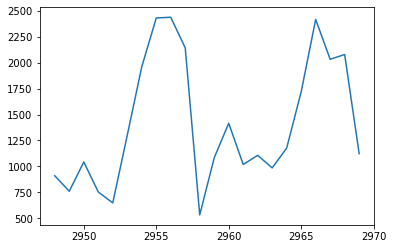

In [381]:
tmp_consno = tmp0['id'].iloc[669]  # 普通户
v2 = find10(list(elec_month.query("id==@tmp_consno").sort_values('ym')['pq_z']))
elec_month.query("id==@tmp_consno").sort_values('ym')['pq_z'].plot()
print(v2)

### 如果用整体月电量进一步规范化数据呢？

# 日用电量

In [100]:
# 看日用电量
# 如果看峰谷比值？

elec_day_all = pd.merge(elec_day,user_all,how='left',left_on='id',right_index=True)
elec_day_all

,id,rq,kwh,kwh_rap,kwh_pap_r1,kwh_pap_r2,kwh_pap_r3,kwh_pap_r4,label,RUN_CAP
0,329449398,2020-01-22 00:00:00,11.77,0.0,0.0,7.40,0.0,4.36,0,8.0
1,329449398,2020-01-23 00:00:00,16.54,0.0,0.0,8.68,0.0,7.86,0,8.0
2,329449398,2020-01-24 00:00:00,10.86,0.0,0.0,5.51,0.0,5.36,0,8.0
3,329449398,2020-01-25 00:00:00,10.91,0.0,0.0,6.48,0.0,4.43,0,8.0
4,329449398,2020-01-26 00:00:00,10.85,0.0,0.0,6.32,0.0,4.52,0,8.0
...,...,...,...,...,...,...,...,...,...,...
954564,2878334859,2021-10-05 00:00:00,7.22,NaN,0.0,4.49,0.0,2.73,0,13.0
954565,2878334859,2021-10-06 00:00:00,7.23,NaN,0.0,4.48,0.0,2.74,0,13.0
954566,2878334859,2021-10-07 00:00:00,7.20,NaN,0.0,4.48,0.0,2.73,0,13.0
954567,2878334859,2021-10-08 00:00:00,7.23,NaN,0.0,4.50,0.0,2.73,0,13.0


### 看重点节假日的用电量情况？
比如春节、国庆等

<AxesSubplot:>

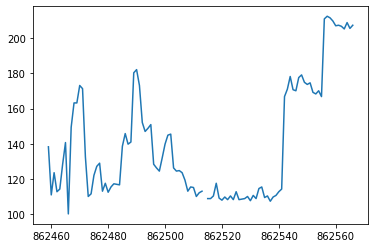

In [288]:
# 挖矿户
elec_day.query('id==2674563661').sort_values('rq')['kwh'].plot()

<AxesSubplot:>

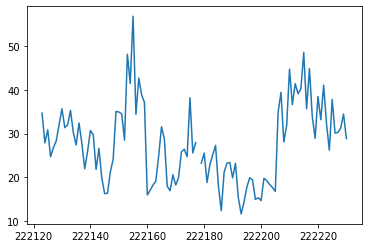

In [383]:
# 普通户
tmp_consno = tmp0['id'].iloc[238]
elec_day.query("id==@tmp_consno").sort_values('rq')['kwh'].plot()

2695447713


<AxesSubplot:>

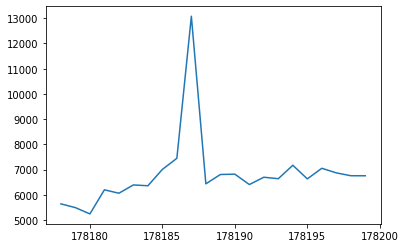

In [353]:
tmp_consno = target.index[4]
print(tmp_consno)
elec_month.query("id==@tmp_consno").sort_values('ym')['pq_z'].plot()

<AxesSubplot:>

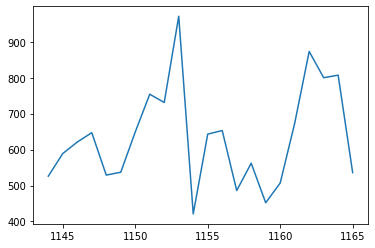

In [302]:
tmp_consno = tmp0['id'].iloc[200]
elec_month.query("id==@tmp_consno").sort_values('ym')['pq_z'].plot()

结论：普通用户的年度有明显的相似性和季节性，挖矿用户则不是

# 使用月用电量建模

In [3]:
# 构造需要使用的月用电量数据
# 构造相应的维度信息



In [59]:
data_cons = cons_info[['ID','RUN_CAP','IS_FLAG']]
data_cons.set_index("ID",inplace=True)
# data_cons = data_cons.set_index('ID')
data_cons

,RUN_CAP,IS_FLAG
ID,,
329465205,4.0,0
329465245,4.0,0
329465357,8.0,0
329465360,2.0,0
329465439,8.0,0
...,...,...
2862711473,39.0,0
2864274650,13.0,0
2872313739,39.0,0


In [148]:
# 最大用电量月及其数据
data_maxmon = elec_month.groupby('id').apply(lambda x:x.sort_values('pq_g',ascending=False).head(1))
data_maxmon.set_index('id',inplace=True)
data_maxmon

,ym,pq_f,pq_g,pq_p,pq_z
id,,,,,
329449398,202010,447,248,-1,694
329450189,202003,1052,520,1,1573
329450568,202102,11,22,1,34
329450586,202010,195,126,-1,320
329450735,202010,39,17,1,57
...,...,...,...,...,...
2877042216,202108,12,8,0,20
2877193822,202010,195,102,1,298
2877691819,202106,1352,607,-1,1958


In [166]:
# 每户的统计电量
data_mon = elec_month.groupby('id')['pq_z'].agg(['max','min','median',lambda x:np.percentile(x,80)])
data_mon.columns = ['max','min','median','p80']
data_mon

,max,min,median,p80
id,,,,
329449398,694,175,293.5,401.8
329450189,1573,258,520.0,669.4
329450568,34,0,0.0,0.8
329450586,320,154,172.0,178.0
329450735,57,7,11.5,17.8
...,...,...,...,...
2877042216,20,0,1.5,6.6
2877193822,484,11,191.5,353.4
2877691819,2914,9,1224.5,1534.6


In [190]:
# 组合起来
data_cm = data_cons.join(data_maxmon).join(data_mon)
data_cm['pq_fg']=data_cm['pq_f']/data_cm['pq_g']
data_cm['pm']=data_cm['p80']/data_cm['max']
# 特殊值
data_cm['pq_fg'].fillna(0,inplace=True)
data_cm['pm'].fillna(0,inplace=True)

data_cm['pq_fg'][np.isinf(data_cm['pq_fg'])] = -1

np.max(data_cm)

C:\Users\horse\Anaconda3\envs\math\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


RUN_CAP      2085.0
IS_FLAG         1.0
ym         202110.0
pq_f        32670.0
pq_g        16682.0
pq_p        27630.0
pq_z        74260.0
max         74260.0
min         27940.0
median      41185.0
p80         42224.0
pq_fg          99.0
pm              1.0
dtype: float64

In [168]:
# 测试一下
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [191]:
X=data_cm.copy()
y=X['IS_FLAG']
# y
X = X.drop('IS_FLAG',axis=1)
# X

In [199]:
clf = DecisionTreeClassifier(max_depth=5,class_weight='balanced')
# 这里必须加权，因为正反例数量相差过大
clf.fit(X,y)
yp = clf.predict(X)
print(classification_report(y,yp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8830
           1       0.91      1.00      0.95        10

    accuracy                           1.00      8840
   macro avg       0.95      1.00      0.98      8840
weighted avg       1.00      1.00      1.00      8840



In [200]:
pd.DataFrame([X.columns,clf.feature_importances_])
# 最大月份谷时段用电量是最重要的

,0,1,2,3,4,5,6,7,8,9,10,11
0,RUN_CAP,ym,pq_f,pq_g,pq_p,pq_z,max,min,median,p80,pq_fg,pm
1,0.0,0.0,0.0,0.986949,0.0,0.0,0.0,0.0,0.0,0.000453,0.011015,0.001584


# 加载测试数据


In [156]:
#
cons_info_test = pd.read_csv("./data/测试组_比特币挖矿_档案明细（20211220）.csv", index_col=0, quotechar='"', encoding="gbk")
# 
# test_elec_day = pd.read_csv("./data/训练组_比特币挖矿_日用电明细（20211217）.csv")
#
#
elec_month_test = pd.read_csv("./data/测试组_比特币挖矿_月用电明细（20211217）.csv")

In [158]:
cons_info_test

,ELEC_TYPE_NAME,VOLT_NAME,PRC_NAME,CONTRACT_CAP,RUN_CAP,SHIFT_NO,BUILD_DATE,CANCEL_DATE,CHK_CYCLE,LAST_CHK_DATE,TMP_NAME,TMP_DATE
ID,,,,,,,,,,,,
179406029,城镇居民生活用电,交流220V,居民生活<1kV(合表),2.0,2.0,1.0,1998/12/1,NaN,24,1998/12/1,非临时用电,NaN
179406030,城镇居民生活用电,交流220V,居民生活<1kV(合表),12.0,12.0,NaN,1998/12/1,NaN,24,1998/12/1,非临时用电,NaN
179406094,城镇居民生活用电,交流220V,居民生活<1kV(合表),2.0,2.0,1.0,1999/4/1,NaN,24,1999/4/1,非临时用电,NaN
179406097,城镇居民生活用电,交流220V,居民生活<1kV(合表),4.0,4.0,1.0,1999/3/1,NaN,36,1999/3/1,非临时用电,NaN
179406099,城镇居民生活用电,交流220V,居民生活<1kV(合表),2.0,2.0,1.0,1998/12/1,NaN,24,1998/12/1,非临时用电,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2849971818,乡村居民生活用电,交流220V,居民生活<1kV(合表),12.0,12.0,NaN,2019/11/8 12:42:00,NaN,120,2019/11/8 12:42:00,非临时用电,NaN
2850017469,乡村居民生活用电,交流380V,居民生活<1kV(合表),120.0,120.0,NaN,2019/11/18 14:08:00,NaN,120,2019/11/18 14:08:00,非临时用电,NaN
2850017472,乡村居民生活用电,交流380V,居民生活<1kV(合表),720.0,720.0,NaN,2019/11/18 14:08:00,NaN,120,2019/11/18 14:08:00,非临时用电,NaN


In [159]:
# 转化
data_cons_test = cons_info_test[['RUN_CAP']]

data_cons_test

,RUN_CAP
ID,
179406029,2.0
179406030,12.0
179406094,2.0
179406097,4.0
179406099,2.0
...,...
2849971818,12.0
2850017469,120.0
2850017472,720.0


In [160]:
data_maxmon_test = elec_month_test.groupby('id').apply(lambda x:x.sort_values('pq_g',ascending=False).head(1))
data_maxmon_test.set_index('id',inplace=True)
data_maxmon_test

,ym,pq_f,pq_g,pq_p,pq_z
id,,,,,
179404030,202110,2169,1504,-1,3672
179404040,202001,0,0,569,569
179404046,202107,2352,1796,-1,4147
179404049,202010,1566,1145,-1,2710
179404054,202001,0,0,570,570
...,...,...,...,...,...
2877297622,202003,30,52,1,83
2878310631,202105,155,69,-1,223
2880078775,202010,560,1249,1,1810


In [163]:
# 每户的统计电量
data_mon_test = elec_month_test.groupby('id')['pq_z'].agg(['max','min','median',lambda x:np.percentile(x,80)])
data_mon_test.columns = ['max','min','median','p80']
data_mon_test

,max,min,median,p80
id,,,,
179404030,3672,157,1319.0,2528.8
179404040,1020,149,458.5,680.8
179404046,4147,1699,2326.0,3248.2
179404049,2710,1050,1457.0,1648.8
179404054,976,116,376.0,562.0
...,...,...,...,...
2877297622,83,0,46.0,64.0
2878310631,223,0,97.0,206.0
2880078775,1810,0,709.0,937.8


In [201]:
# 组合起来
data_cm_test = data_cons_test.join(data_maxmon_test).join(data_mon_test)
data_cm_test['pq_fg']=data_cm_test['pq_f']/data_cm_test['pq_g']
data_cm_test['pm']=data_cm_test['p80']/data_cm_test['max']
# 特殊值
data_cm_test['pq_fg'].fillna(0,inplace=True)
data_cm_test['pm'].fillna(0,inplace=True)

data_cm_test['pq_fg'][np.isinf(data_cm_test['pq_fg'])] = -1
data_cm_test

C:\Users\horse\Anaconda3\envs\math\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,RUN_CAP,ym,pq_f,pq_g,pq_p,pq_z,max,min,median,p80,pq_fg,pm
ID,,,,,,,,,,,,
179406029,2.0,202008,463,672,0,1135,1366,587,737.0,986.4,0.688988,0.722108
179406030,12.0,202001,0,0,461,461,865,131,305.5,461.8,0.000000,0.533873
179406094,2.0,202107,538,90,1,629,984,483,564.0,629.8,5.977778,0.640041
179406097,4.0,202010,800,499,0,1299,1299,360,637.5,810.2,1.603206,0.623711
179406099,2.0,202007,450,317,0,767,804,80,399.0,505.0,1.419558,0.628109
...,...,...,...,...,...,...,...,...,...,...,...,...
2849971818,12.0,202010,57,496,1,554,554,125,197.0,265.4,0.114919,0.479061
2850017469,120.0,202001,0,0,0,0,0,0,0.0,0.0,0.000000,0.000000
2850017472,720.0,202010,16330,10182,14300,40812,40812,0,24569.0,29385.6,1.603811,0.720024


In [202]:
y_test = clf.predict(data_cm_test)

In [209]:
res_test = pd.Series(y_test,index=data_cm_test.index)
res_test.describe()

count    15379.000000
mean         0.002081
std          0.045569
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
dtype: float64

In [207]:
res_test.to_excel('2022年2月13日.xlsx') # 得分 0.74580657470 